In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from typing import List

In [2]:
df = pd.read_csv('../FilteredData/Filtered_56965.csv', encoding='utf-8-sig')

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.groupby('Label').count()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
LDAP,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
MSSQL,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
NetBIOS,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
Portmap,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
Syn,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
UDP,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965,...,56965,56965,56965,56965,56965,56965,56965,56965,56965,56965
UDPLag,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,...,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873


In [5]:
label_mapping = {
    'BENIGN':  0,
    'LDAP':    1,
    'MSSQL':   2,
    'NetBIOS': 3,
    'Portmap': 4,
    'Syn':     5,
    'UDP':     6,
    'UDPLag':  7
}

df['Category'] = df['Label'].map(label_mapping)

In [6]:
df

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Category
0,172.16.0.5,33187,192.168.50.4,19356,6,1,2,0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn,5
1,172.16.0.5,18493,192.168.50.4,20571,6,54,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn,5
2,172.16.0.5,49697,192.168.50.4,54375,6,48,2,0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn,5
3,172.16.0.5,835,192.168.50.4,45,6,103,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn,5
4,172.16.0.5,21801,192.168.50.4,20658,6,0,2,0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400623,192.168.50.4,61850,172.16.0.5,49959,17,3,2,0,884.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,UDPLag,7
400624,172.16.0.5,61850,192.168.50.4,61926,17,3,2,0,884.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,7
400625,192.168.50.4,61850,172.16.0.5,61926,17,3,2,0,884.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,UDPLag,7
400626,172.16.0.5,61850,192.168.50.4,26755,17,2,2,0,884.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,7


In [7]:
def ip_to_int(ip: str) -> int:
    octets = ip.split('.')
    # Nagyobb prioritást adok a legelső oktettnek kategorizálási okokból.
    return (int(octets[0]) << 24) + (int(octets[1]) << 16) + (int(octets[2]) << 8) + int(octets[3])

df['Source IP'] = df['Source IP'].apply(ip_to_int)
df['Destination IP'] = df['Destination IP'].apply(ip_to_int)

In [8]:
# Szétosztás train és test adatokra.
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-2], df.Category, test_size=0.25)

In [9]:
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [10]:
smote = SMOTE(random_state=27)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [11]:
y_train.count()

300471

In [12]:
# cv = CountVectorizer()
# x_train_count = cv.fit_transform(x_train.ravel().values)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=27)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=27)

In [14]:
# model = MultinomialNB()
# model.fit(x_train_scaled, y_train)

In [20]:
train_accuracy = model.score(x_train_scaled, y_train)

In [21]:
test_accuracy = model.score(x_test_scaled, y_test)

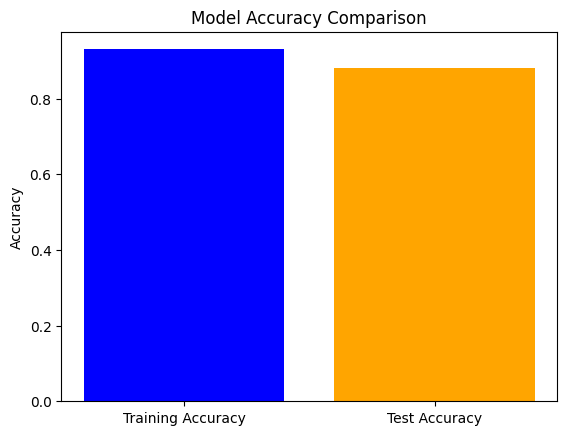

In [25]:
labels = ['Training Accuracy', 'Test Accuracy']

heights = [train_accuracy, test_accuracy]

plt.bar(labels, heights, color=['blue', 'orange'])

plt.title('Model Accuracy Comparison')

plt.ylabel('Accuracy')

plt.show()